In [1]:
# !pip list

In [2]:
import tensorflow as tf 
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [5]:
## Here are minimum requirements

In [3]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in  gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
data_dir = "C:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/GenderClassifier/data"

In [6]:
image_exts = ['jpeg','jpg','bmp','png']

In [8]:
## listdir - Identifies the url or Path

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

11mag-Sheldrake-articleLarge.jpg
1200px-Outdoors-man-portrait_28cropped29.jpg
14formula-one-ftjw-articleLarge.jpg
166698404-portrait-of-a-local-man-in-kampala-uganda.jpg
1675088235-1674833455-rege-jean-page_lofficiel-edited.png
220px-Kye_Allums.jpg
315213304_5871610322890949_107669858122705926_n.jpg
360_F_115852367_E6iIYA8OxHDmRhjw7kOq4uYe4t440f14.jpg
360_F_224869519_aRaeLneqALfPNBzg0xxMZXghtvBXkfIA.jpg
360_F_316726850_Kp5gHry52XIA0Cedl7b2K1remR1hJ8NU.jpg
360_F_326985142_1aaKcEjMQW6ULp6oI9MYuv8lN9f8sFmj.jpg
390417-667087f.jpg
7X9A6926.jpg
83890825.jpg
83890830.jpg
8nGMJCEkeir0XG7j6aORMJ45kwgxQb82mVTV4cwZ.jpg
97442630.jpg
a5873efd1998670e2004e8d0da992feb-man-maroon-shirt-pouting_l.jpeg
Addressing-the-pressure-to-man-up-warren-wong-uuVguyksViA-unsplash4.jpg
ae077-man-rests-his-head-on-his-hand-while-sitting-on-a-couch-and-smiling_l.jpeg
AGvuzYZmagwGzfFX4JsuiKHv0TyjkUXEIK3JOL8q2SrDs64-c-mo.jpg
anivcjqt5xkr3tilo5a377b2f51a3a.jpg
Ant-Man_28film29_poster.jpg
ap22312071681283-0d9c328f69a7c7f1

In [17]:
img = cv2.imread(os.path.join(data_dir, 'men-images', 'image10.jpeg'))

In [18]:
img.shape

(100, 100, 3)

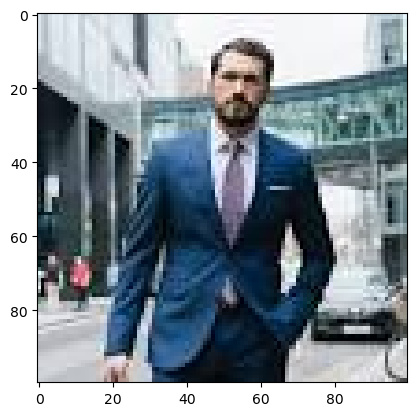

In [19]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
img = cv2.imread(os.path.join(data_dir, 'men-images', 'images9.jpg'))

In [21]:
img.shape

(275, 183, 3)

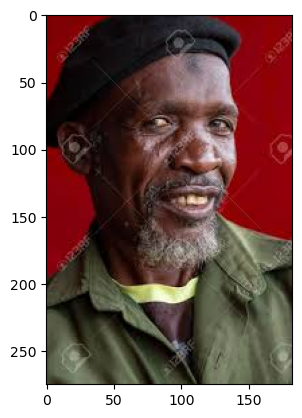

In [22]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [25]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in list exts".format(image_path))
                os.remove(image_path)
                
        except Exception as e:
            print("Issue with image{}". format(image_path))

Issue with imageC:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/GenderClassifier/data\men-images\11mag-Sheldrake-articleLarge.jpg
Issue with imageC:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/GenderClassifier/data\men-images\1200px-Outdoors-man-portrait_28cropped29.jpg
Issue with imageC:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/GenderClassifier/data\men-images\14formula-one-ftjw-articleLarge.jpg
Issue with imageC:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/GenderClassifier/data\men-images\166698404-portrait-of-a-local-man-in-kampala-uganda.jpg
Issue with imageC:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/GenderClassifier/data\men-images\1675088235-1674833455-rege-jean-page_lofficiel-edited.png
Issue with imageC:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/GenderClassifier/data\men-images\220px-Kye_Allums.jpg
Issue with imageC:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/GenderClassifier/data\men-images\315213304_5871610322890949_107669858122705926_n.jpg

In [34]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 504 files belonging to 2 classes.


In [35]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
data_iterator = data.as_numpy_iterator()

In [29]:
data_iterator

In [36]:
batch = data_iterator.next()

In [39]:
batch[1]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1])

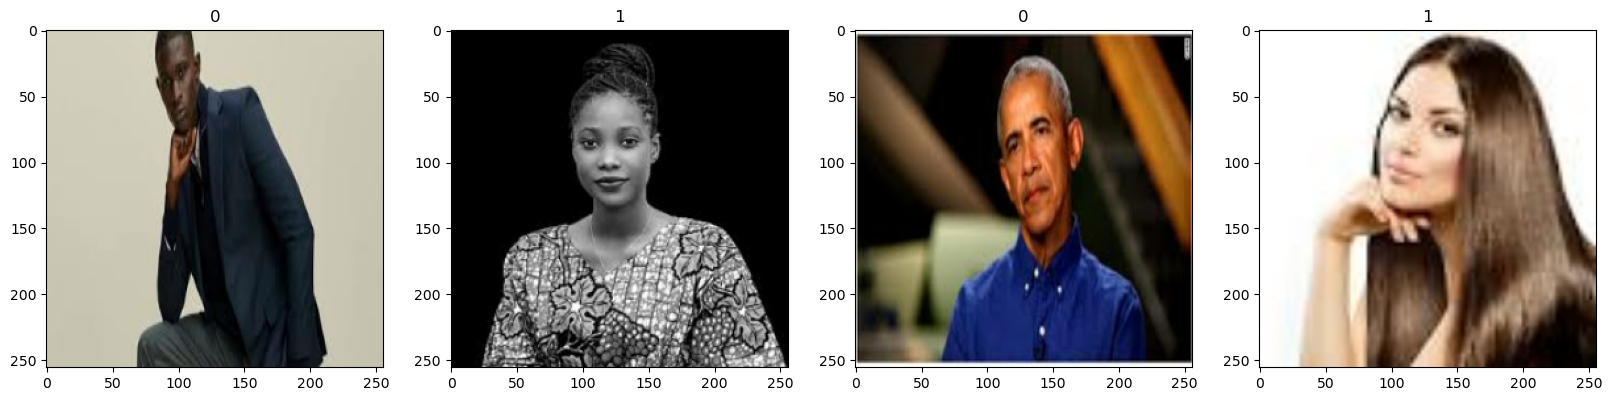

In [40]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [41]:
# 0 - Male
# 1 - Female

In [42]:
data = data.map(lambda x, y: (x/255, y))

In [44]:
scaled_iterator = data.as_numpy_iterator()

In [45]:
batch = data.as_numpy_iterator().next()

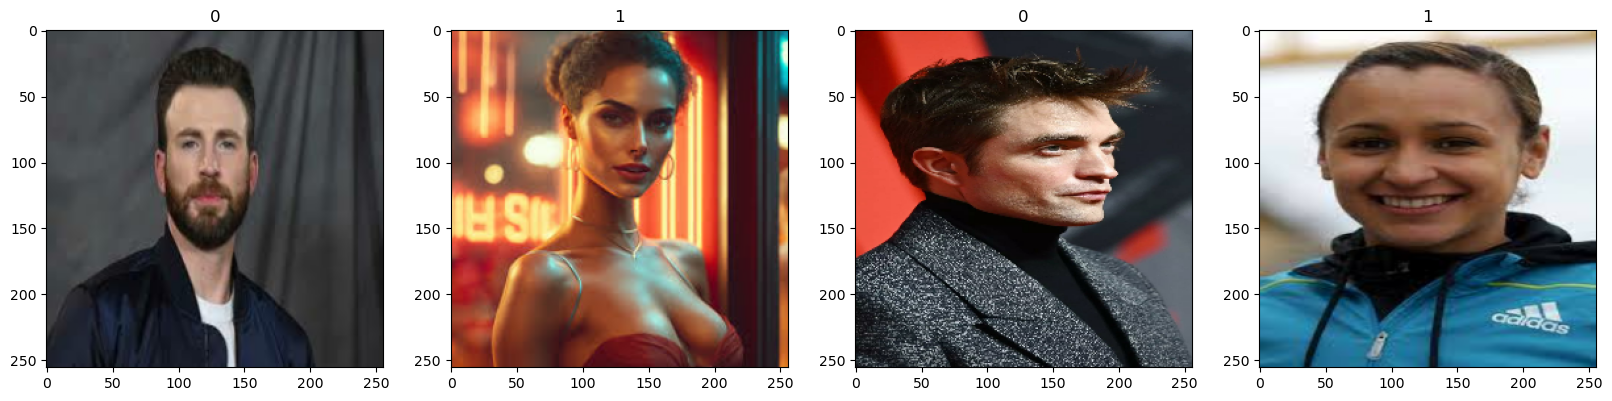

In [48]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [49]:
len(data)

16

In [50]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [51]:
val_size + test_size + train_size

16

In [52]:
train_set = data.take(train_size)
val_set = data.skip(train_size).take(val_size)
test_set = data.skip(val_size + train_size).take(test_size)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [54]:
model = Sequential()

In [55]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256,3)))
model.add(MaxPooling2D())

In [56]:
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

In [57]:
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

In [58]:
model.add(Flatten())

In [59]:
model.add(Dense(256, activation='relu'))

In [60]:
model.add(Dense(256, activation='relu'))

In [61]:
model.add(Dense(1, activation='sigmoid'))

In [62]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [64]:
logdir = 'C:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/GenderClassifier/logdir'

In [65]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [66]:
hist = model.fit(train_set, epochs=20, validation_data = val_set, callbacks=[tensorboard_callback])

Epoch 1/20
11/11 [==============================] - 23s 2s/step - loss: 0.8855 - accuracy: 0.4858 - val_loss: 0.6911 - val_accuracy: 0.6771
Epoch 2/20
11/11 [==============================] - 21s 2s/step - loss: 0.6892 - accuracy: 0.6392 - val_loss: 0.6812 - val_accuracy: 0.5000
Epoch 3/20
11/11 [==============================] - 21s 2s/step - loss: 0.6428 - accuracy: 0.6222 - val_loss: 0.6104 - val_accuracy: 0.6667
Epoch 4/20
11/11 [==============================] - 21s 2s/step - loss: 0.5885 - accuracy: 0.7017 - val_loss: 0.5807 - val_accuracy: 0.6667
Epoch 5/20
11/11 [==============================] - 22s 2s/step - loss: 0.5295 - accuracy: 0.7472 - val_loss: 0.4203 - val_accuracy: 0.8646
Epoch 6/20
11/11 [==============================] - 21s 2s/step - loss: 0.4262 - accuracy: 0.8011 - val_loss: 0.3629 - val_accuracy: 0.8542
Epoch 7/20
11/11 [==============================] - 21s 2s/step - loss: 0.3903 - accuracy: 0.8381 - val_loss: 0.4220 - val_accuracy: 0.8125
Epoch 8/20
11/11 [==

In [67]:
hist.history

{'loss': [0.8855069875717163,
  0.6892171502113342,
  0.6428056955337524,
  0.5884881615638733,
  0.5295263528823853,
  0.42615175247192383,
  0.3902754783630371,
  0.2925085723400116,
  0.20410281419754028,
  0.17346744239330292,
  0.1264479011297226,
  0.09220757335424423,
  0.04625283181667328,
  0.056489065289497375,
  0.037715669721364975,
  0.024266928434371948,
  0.03231646493077278,
  0.025877606123685837,
  0.006652159616351128,
  0.004278793931007385],
 'accuracy': [0.4857954680919647,
  0.6392045617103577,
  0.6221590638160706,
  0.7017045617103577,
  0.7471590638160706,
  0.8011363744735718,
  0.8380681872367859,
  0.8806818127632141,
  0.9204545617103577,
  0.9431818127632141,
  0.9801136255264282,
  0.9715909361839294,
  0.9886363744735718,
  0.9886363744735718,
  0.9886363744735718,
  0.9943181872367859,
  0.9971590638160706,
  0.9914772510528564,
  1.0,
  1.0],
 'val_loss': [0.6911105513572693,
  0.6812486052513123,
  0.6103552579879761,
  0.5807107090950012,
  0.420311

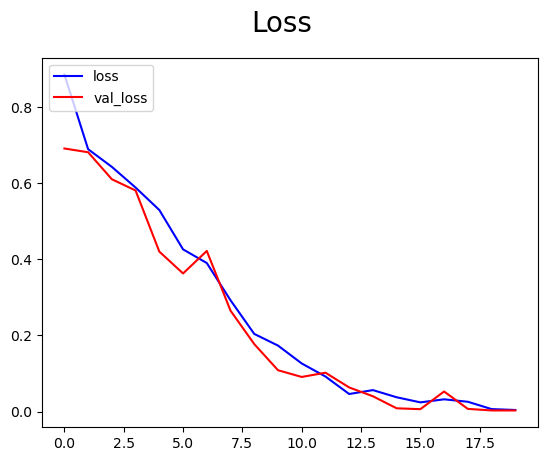

In [68]:
fig = plt.figure()
plt.plot(hist.history['loss'], color="blue", label='loss')
plt.plot(hist.history['val_loss'], color="red", label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

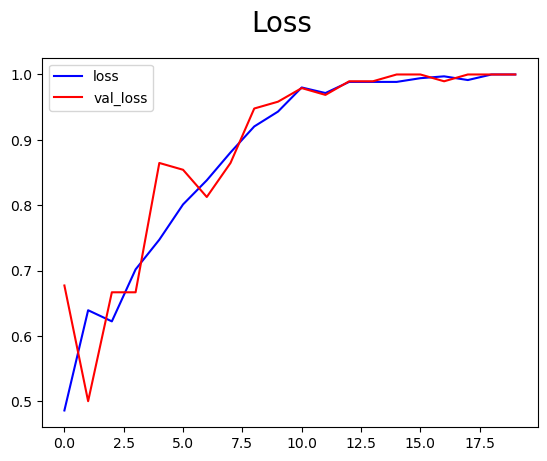

In [69]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color="blue", label='loss')
plt.plot(hist.history['val_accuracy'], color="red", label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [70]:
testdir = 'C:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/GenderClassifier'

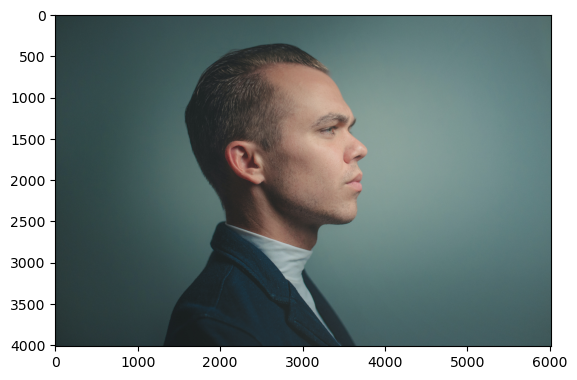

In [71]:
test_img = cv2.imread(os.path.join('white.jpg'))
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.show()

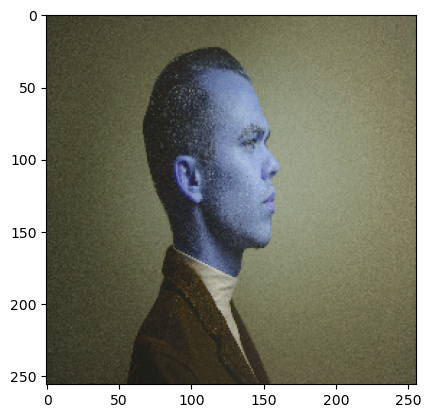

In [72]:
resize = tf.image.resize(test_img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [73]:
np.expand_dims(resize, 0)

array([[[[ 63.125   ,  64.375   ,  44.625   ],
         [ 62.34375 ,  60.34375 ,  42.34375 ],
         [ 62.195312,  60.195312,  42.195312],
         ...,
         [102.421875, 105.421875,  79.421875],
         [100.      , 103.      ,  77.      ],
         [100.57031 , 103.57031 ,  77.57031 ]],

        [[ 62.125   ,  62.875   ,  46.875   ],
         [ 53.289062,  53.289062,  35.289062],
         [ 57.171875,  57.171875,  41.171875],
         ...,
         [ 96.24219 ,  99.24219 ,  73.24219 ],
         [104.61719 , 107.61719 ,  81.61719 ],
         [ 99.19531 , 102.19531 ,  76.19531 ]],

        [[ 59.140625,  59.140625,  43.140625],
         [ 66.984375,  66.984375,  48.984375],
         [ 54.414062,  54.414062,  38.414062],
         ...,
         [104.296875, 107.296875,  81.296875],
         [115.96875 , 118.96875 ,  92.96875 ],
         [102.55469 , 105.55469 ,  79.55469 ]],

        ...,

        [[ 64.09375 ,  61.09375 ,  46.09375 ],
         [ 52.046875,  51.046875,  37.046875]

In [74]:
img_predict = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 173ms/step


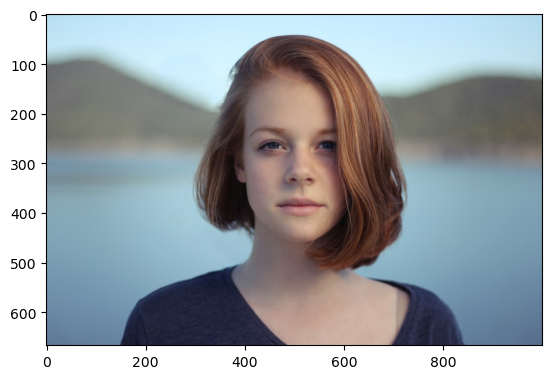

In [75]:
predict_img = cv2.imread(os.path.join('human2.jpg'))
plt.imshow(cv2.cvtColor(predict_img, cv2.COLOR_BGR2RGB))
plt.show()

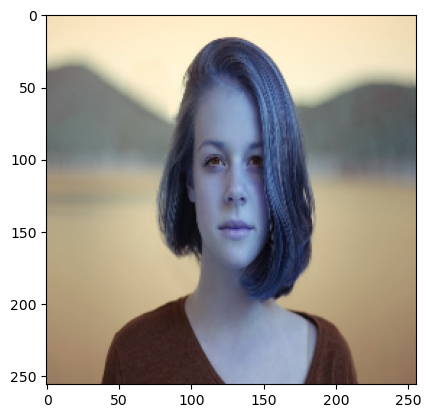

In [76]:
resize2 = tf.image.resize(predict_img, (256, 256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [77]:
np.expand_dims(resize2, 0)

array([[[[242.      , 220.      , 184.      ],
         [242.      , 220.35938 , 183.64062 ],
         [242.46875 , 222.26562 , 183.46875 ],
         ...,
         [237.      , 216.      , 178.      ],
         [237.      , 216.      , 178.      ],
         [237.      , 216.      , 178.      ]],

        [[243.      , 221.      , 185.      ],
         [243.      , 221.35938 , 184.64062 ],
         [242.8692  , 223.1572  , 184.68561 ],
         ...,
         [237.5654  , 216.5654  , 178.5654  ],
         [237.      , 216.      , 178.      ],
         [237.      , 216.      , 178.      ]],

        [[244.      , 222.      , 186.      ],
         [243.28125 , 222.35938 , 186.      ],
         [242.      , 223.      , 185.      ],
         ...,
         [238.      , 217.      , 179.      ],
         [238.      , 217.      , 179.      ],
         [238.      , 217.      , 179.      ]],

        ...,

        [[153.54688 , 122.006195,  98.993805],
         [153.      , 123.00491 ,  97.99509 ]

In [78]:
predict = model.predict(np.expand_dims(resize2/255, 0))

1/1 [==============================] - 0s 39ms/step


In [79]:
predict

array([[0.9814311]], dtype=float32)

In [80]:
if predict < 0.5:
    print('Male')
else:
    print("Female")

Female
